# BUSSINESS UNDERSTANDING

dataset: https://www.kaggle.com/datasets/prathamtripathi/drug-classification?datasetId=830916&sortBy=voteCount

Banyaknya obat yang beredar saat ini, maka di perlukannya model pembelajaran mesin untuk memprediksi hasil dari jenis obat yang mungkin cocok untuk pasien. Kumpulan data berisi berbagai informasi yang memengaruhi prediksi seperti Usia, Jenis Kelamin, BP, kadar Kolesterol, Rasio Na terhadap Kalium, dan akhirnya jenis obat.

1. Tentukan Library yang digunakan

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

2. Load Dataset

In [56]:
obat_dataset = pd.read_csv('drug200.csv')

# DATA UNDERSTANDING

Deskripsi Tabel:

Drug type : Jenis obat (drugA, drugB, drugC, drugX, DrugY)

Age : Umur

Sex : Jenis Kelamin (Perempuan/Laki-Laki)

Blood Pressure Levels (BP) : Level Tekanan Darah (Rendah, Normal, Tinggi)

Cholesterol Levels : Level Kolesterol (Normal/Tinggi)

Na to Potassium Ration : Rasio Natrium ke Kalium dalam Darah

In [57]:
obat_dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [58]:
obat_dataset.shape

(200, 6)

In [59]:
obat_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [60]:
obat_dataset.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [61]:
obat_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


# DATA PREPARATION

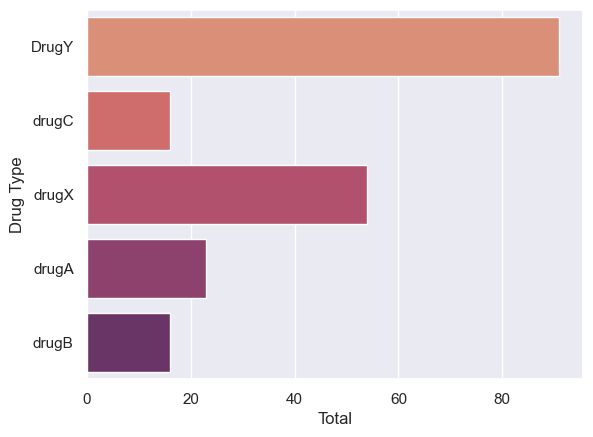

In [62]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=obat_dataset, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

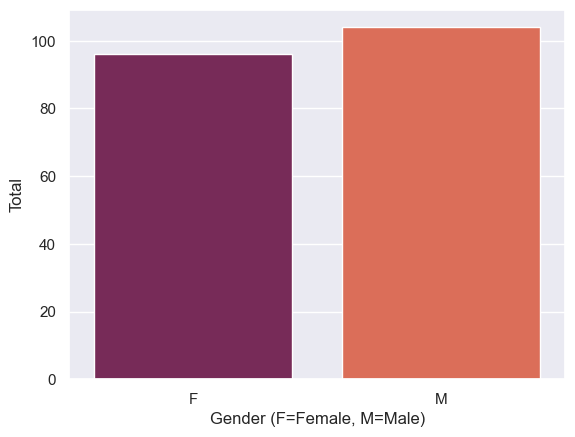

In [63]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=obat_dataset, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

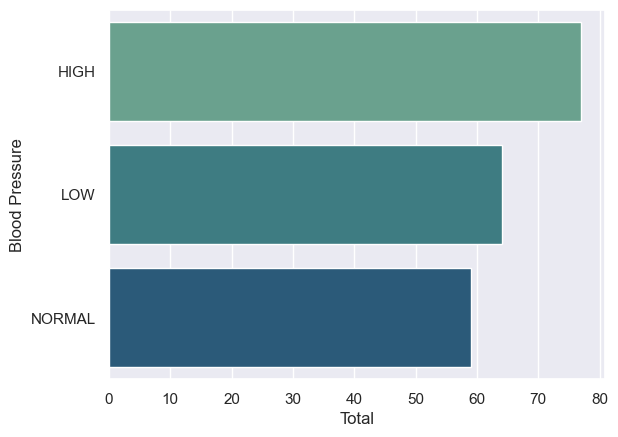

In [64]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=obat_dataset, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

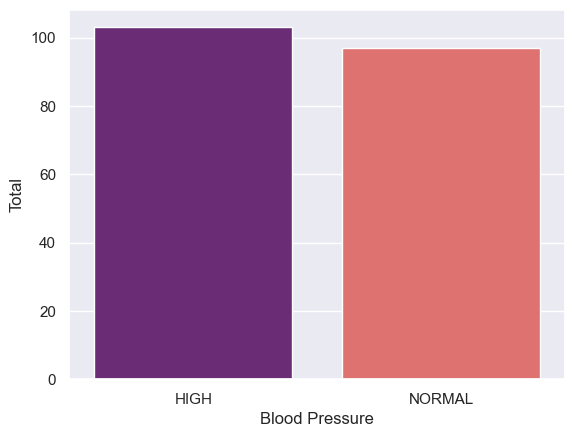

In [65]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=obat_dataset, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

In [66]:
obat_dataset.rename(columns={'Age':'Umur',
                                'Sex':'Jenis_Kelamin',
                                'BP':'Tekanan_Darah',
                                'Cholesterol':'Kolestrol',
                                'Na_to_K':'Rasio_Natrium'}, inplace=True)

In [67]:
obat_dataset['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [68]:
obat_dataset['Jenis_Kelamin'].value_counts()

Jenis_Kelamin
M    104
F     96
Name: count, dtype: int64

In [69]:
obat_dataset['Tekanan_Darah'].value_counts()

Tekanan_Darah
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [70]:
obat_dataset['Kolestrol'].value_counts()

Kolestrol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [71]:
obat_dataset.columns

Index(['Umur', 'Jenis_Kelamin', 'Tekanan_Darah', 'Kolestrol', 'Rasio_Natrium',
       'Drug'],
      dtype='object')

In [72]:
obat_dataset['Jenis_Kelamin'] = obat_dataset['Jenis_Kelamin'].replace(['F', 'M'], [0,1])
obat_dataset['Tekanan_Darah'] = obat_dataset['Tekanan_Darah'].replace(['LOW', 'NORMAL', 'HIGH'], [0,1,2])
obat_dataset['Kolestrol'] = obat_dataset['Kolestrol'].replace(['NORMAL', 'HIGH'], [1,2])
obat_dataset['Drug'] = obat_dataset['Drug'].replace(['drugA', 'drugB', 'drugC', 'drugX', 'DrugY'], [0,1,2,3,4])

In [73]:
obat_dataset.head()

,Umur,Jenis_Kelamin,Tekanan_Darah,Kolestrol,Rasio_Natrium,Drug
0,23,0,2,2,25.355,4
1,47,1,0,2,13.093,2
2,47,1,0,2,10.114,2
3,28,0,1,2,7.798,3
4,61,0,0,2,18.043,4


# MODELLING

In [74]:
# memisahkan data dan label
X = obat_dataset.drop (columns='Drug', axis=1)
Y = obat_dataset['Drug']

In [75]:
print(X)

     Umur  Jenis_Kelamin  Tekanan_Darah  Kolestrol  Rasio_Natrium
0      23              0              2          2         25.355
1      47              1              0          2         13.093
2      47              1              0          2         10.114
3      28              0              1          2          7.798
4      61              0              0          2         18.043
..    ...            ...            ...        ...            ...
195    56              0              0          2         11.567
196    16              1              0          2         12.006
197    52              1              1          2          9.894
198    23              1              1          1         14.020
199    40              0              0          1         11.349

[200 rows x 5 columns]


In [76]:
print(Y)

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64


In [77]:
X = obat_dataset.drop (columns='Drug', axis=1)
Y = obat_dataset['Drug']

In [78]:
print(X)
print(Y)

     Umur  Jenis_Kelamin  Tekanan_Darah  Kolestrol  Rasio_Natrium
0      23              0              2          2         25.355
1      47              1              0          2         13.093
2      47              1              0          2         10.114
3      28              0              1          2          7.798
4      61              0              0          2         18.043
..    ...            ...            ...        ...            ...
195    56              0              0          2         11.567
196    16              1              0          2         12.006
197    52              1              1          2          9.894
198    23              1              1          1         14.020
199    40              0              0          1         11.349

[200 rows x 5 columns]
0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [80]:
print(X.shape, X_train.shape, X_test.shape)

(200, 5) (160, 5) (40, 5)


5. Membuat data latih menggunakan algoritma SVM

In [81]:
classifier = svm.SVC(kernel='linear')

In [82]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

6. membuat model evaluasi untuk mengukur tingkat akurasi

In [83]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [84]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  1.0


In [85]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [86]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  1.0


7. Membuat Model Prediksi

In [87]:
input_data = (43,1,2,2,13.972)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshape)
print(prediction)
print()

if prediction == 4:
    print('Jenis obat DrugY')
elif prediction == 3:
    print('Jenis obat drugX')
elif prediction == 2 :
    print('Jenis obat drugC')
elif prediction == 1:
    print('Jenis obat drugB')
else:
    print('Jenis obat drugA')

[0]

Jenis obat drugA


c:\Users\lizap\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


8. simpan model

In [88]:
import pickle

In [89]:
filename = 'obat_model.sav'
pickle.dump(classifier, open(filename,'wb'))